In [1]:
import os
import decord
from torchvision.datasets.folder import make_dataset
from decord import VideoReader
from decord import cpu

decord.bridge.set_bridge('torch')

In [9]:
root = '/mnt/d/serao/bus_dataset/train'
classes = [d.name for d in os.scandir(root) if d.is_dir()]
classes.sort()
class_to_index = {cls_name: i for i, cls_name in enumerate(classes)}
videos_index = make_dataset(root, class_to_index, ('.avi', '.mp4'), is_valid_file=None)

with open('dataset.csv', 'a') as f:
    # f.write('video, class, dataset, len, height, width, channels\n')
    for video, label in videos_index:
        video_split = video.split('/')
        video_name = video_split[-1].split('.')[0]
        reader = VideoReader(video, ctx=cpu(0))
        frame = reader[0]
        line = video_name + ',' + classes[label] + ',' + video_split[-3] + ',' + str(len(reader)) + ',' + str(frame.shape[0]) + ',' + str(frame.shape[1]) + ',' + str(frame.shape[2]) +'\n'
        f.write(line)



In [17]:
import pandas as pd

stat = pd.read_csv('dataset.csv')
stat.groupby(['dataset','class']).agg({
    'dataset': ['count'],
    'len': ['min', 'max', 'mean', 'std'],
    'height': ['min', 'max', 'mean', 'std'],
    'width': ['min', 'max', 'mean', 'std'],
})

dataset len                          height        \
                      count min max       mean       std    min   max   
dataset class                                                           
test    NonViolence     326  16  34  26.361963  6.183175    576  1920   
        Violence        326  16  34  25.420245  5.852922    576  1920   
train   NonViolence     980  34  48  45.926531  4.503853    576  1920   
        Violence        980  34  48  45.562245  4.719854    576  1920   

                                             width                     \
                            mean         std   min   max         mean   
dataset class                                                           
test    NonViolence   683.190184  334.872293   704  2560   877.546012   
        Violence      893.963190  510.696392   704  2560  1224.441718   
train   NonViolence  1359.600000  522.578321   704  2560  1990.400000   
        Violence     1321.028571  524.018155   704  2560  1944.032653   

                                 
                            std  
dataset class                    
test    NonViolence  504.547556  
        Violence     758.350275  
train   NonViolence  653.783185  
        Violence     669.489546

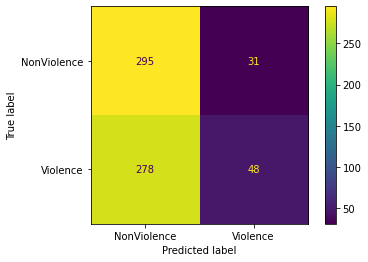

In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test = pd.read_csv('/home/serao/violence_detection/violence-detection/log/predictions.csv')
true = test[['true']].to_numpy()
predicted = test[['predicted']].to_numpy()

conf = confusion_matrix(true, predicted)
disp = ConfusionMatrixDisplay(conf, display_labels=['NonViolence', 'Violence'])
disp.plot()